# Surface plotting of FPN and clusters within FPN

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image, surface, datasets
import hcp_utils as hcp
import nibabel as nib

First lets use the parcellation from hcp.mmp which are the 360 Glasser parcels (+ 20 more that I will ignore). Then extract all the FPN ones and create an array with all zeros except the Parcels I want to plot.

In [48]:
# hcp.mmp is the glasser parcellation
mmp_greyordinates = hcp.mmp.map_all  # an integer array of size 91282, giving the id of each greyordinate
mmp_labels = hcp.mmp.labels
mmp_ids = hcp.mmp.ids

# Set all parcels to 0
Xp = np.zeros(len(hcp.mmp.labels))
print(len(Xp))

# Load the FPN parcellation key file
file_path = '/home/hmueller2/Downloads/FPN_parcellation_cole/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract the 'KEYVALUE' (index) of rows that have 7 as 'NETWORKKEY'
glasser_indices_FPN = []
for line in lines[1:362]:  # Skip the header line
    parts = line.strip().split()
    if parts[9] == '7':  # 'NETWORKKEY' is the 10th column (index 9)
        glasser_indices_FPN.append(parts[1])  # 'KEYVALUE' is the 2nd column (index 1)

print(glasser_indices_FPN)

# Set specific parcels to 1, only consider the first 380 rows
for idx in glasser_indices_FPN:
    if int(idx) < 360:
        Xp[mmp_ids[int(idx)]] = 1

# Remove the first number from Xp
Xp = Xp[1:381]

print(Xp)
print (len(Xp))

380
['14', '15', '29', '63', '73', '77', '80', '82', '83', '85', '89', '91', '92', '97', '98', '111', '133', '144', '145', '149', '170', '171', '194', '195', '209', '238', '242', '243', '253', '254', '257', '260', '261', '263', '265', '269', '271', '272', '273', '277', '278', '291', '313', '324', '325', '329', '342', '350', '351', '357']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.

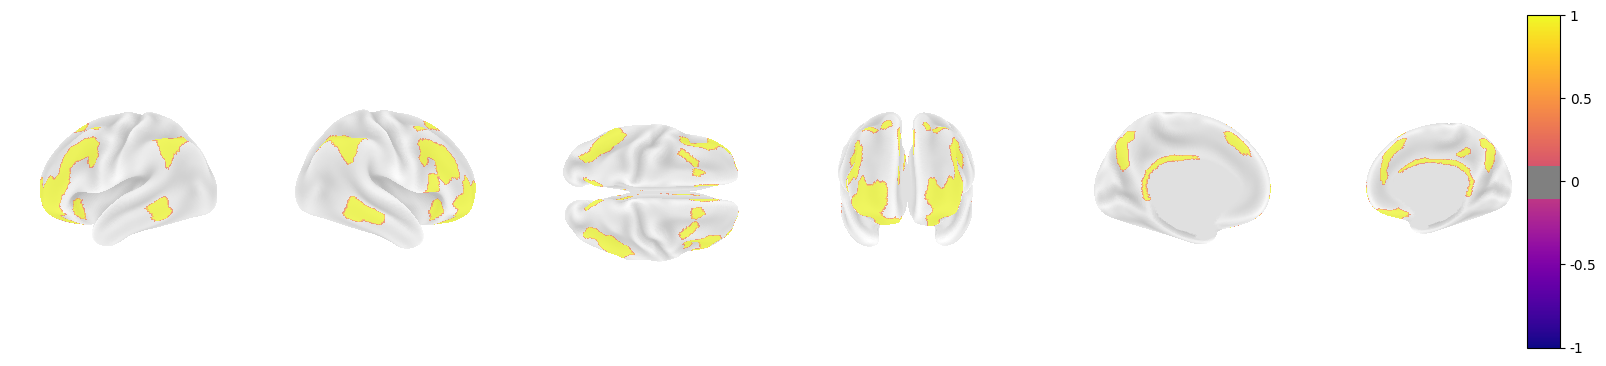

In [49]:
# Map values to surface vertices
surface_data = hcp.unparcellate(Xp, hcp.mmp)
cortex_data = hcp.cortex_data(surface_data)

min_thresh = 0.1
max_thresh = 1
cm = 'plasma'

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(1, 6, 1, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='left', 
    view='lateral', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 2, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='right', 
    view='lateral', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 3, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    view='dorsal', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 4, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    view='anterior', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 5, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.very_inflated_left, 
    hcp.left_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='left', 
    view='medial', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc_left, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 6, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.very_inflated_right, 
    hcp.right_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='right', 
    view='medial', 
    colorbar=True,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc_right, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
plt.show()

/tmp/ipykernel_233426/3090060986.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


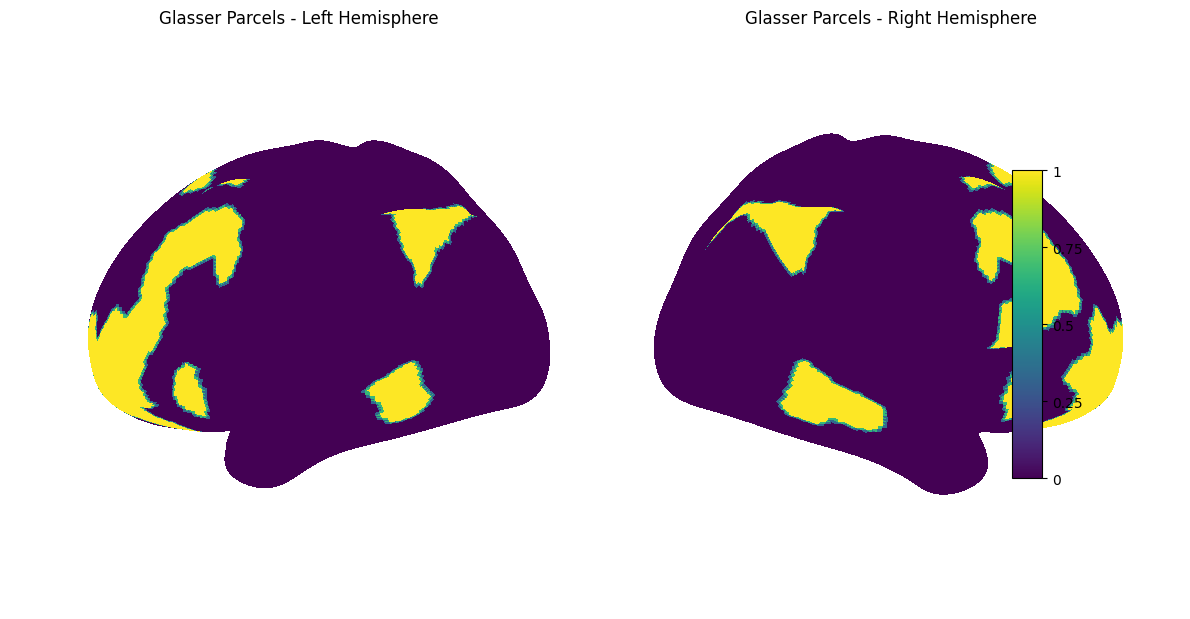

In [ ]:
import matplotlib.pyplot as plt
from nilearn import plotting

# Map values to surface vertices
surface_data = hcp.unparcellate(Xp, hcp.mmp)
cortex_data = hcp.cortex_data(surface_data)

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the parcels on left hemisphere
ax1 = plt.subplot(1, 2, 1, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated,  # Use inflated surface
    cortex_data,        # Parcel data mapped to surface
    view='lateral',     # Lateral view
    colorbar=False,     # Show colorbar
    threshold=min_thresh,
    bg_map=hcp.mesh.sulc,  # Background map to show sulci
    axes=ax1,
    cmap='viridis',
    title="Glasser Parcels - Left Hemisphere"
)

# Plot the parcels on right hemisphere
ax2 = plt.subplot(1, 2, 2, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated,
    cortex_data,
    hemi='right',
    view='lateral',
    colorbar=False,
    threshold=min_thresh,
    bg_map=hcp.mesh.sulc,
    axes=ax2,
    cmap='viridis',
    title="Glasser Parcels - Right Hemisphere"
)

plt.tight_layout()
plt.show()


In [25]:
print(hcp.mmp.labels)
print(hcp.mmp.ids)
print(hcp.mmp.map_all)

{np.int64(0): np.str_(''), np.int64(1): np.str_('L_V1'), np.int64(2): np.str_('L_MST'), np.int64(3): np.str_('L_V6'), np.int64(4): np.str_('L_V2'), np.int64(5): np.str_('L_V3'), np.int64(6): np.str_('L_V4'), np.int64(7): np.str_('L_V8'), np.int64(8): np.str_('L_4'), np.int64(9): np.str_('L_3b'), np.int64(10): np.str_('L_FEF'), np.int64(11): np.str_('L_PEF'), np.int64(12): np.str_('L_55b'), np.int64(13): np.str_('L_V3A'), np.int64(14): np.str_('L_RSC'), np.int64(15): np.str_('L_POS2'), np.int64(16): np.str_('L_V7'), np.int64(17): np.str_('L_IPS1'), np.int64(18): np.str_('L_FFC'), np.int64(19): np.str_('L_V3B'), np.int64(20): np.str_('L_LO1'), np.int64(21): np.str_('L_LO2'), np.int64(22): np.str_('L_PIT'), np.int64(23): np.str_('L_MT'), np.int64(24): np.str_('L_A1'), np.int64(25): np.str_('L_PSL'), np.int64(26): np.str_('L_SFL'), np.int64(27): np.str_('L_PCV'), np.int64(28): np.str_('L_STV'), np.int64(29): np.str_('L_7Pm'), np.int64(30): np.str_('L_7m'), np.int64(31): np.str_('L_POS1'), 